# Homework Set Week 7
## insert your name here

In this homework assignment please fill the indicated cells with your code and explainations, ***run*** everything (select `cell` in the menu, and click `Run all`), save the notebook with your name appended to the filename (for example, `Homework-07-caos.ipynb`), and upload it to canvas.

This homework assignment studies and tests about the classfication. Please import the following modules.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline
from IPython.display import Image, display

# Problem 1: a small puzzle

Download all the images from Canvas, run the following three cells, we know that $f(X) = 0$ for the inputs in the first cell, and $f(X) = 1$ for the inputs in the second cell. Find the $f=?$ in the third cell.

Suggested method: logistic regression by treating each block as a 3x3 matrix and the first 6 images as training samples. Expected output: your logistic regression model $h(\mathbf{x}; \mathbf{w})$ should be very close to 0.5, i.e., your model should not be able to clearly tell the $f=0$ or $1$.

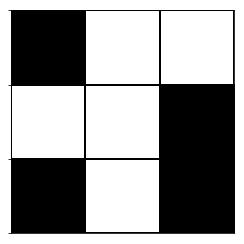

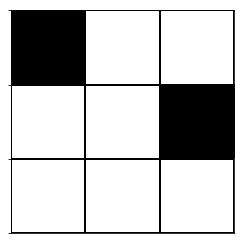

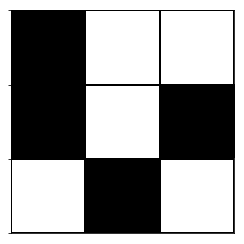

In [3]:
# f=0
display(Image('mat1.png'), Image('mat2.png'), Image('mat3.png'))

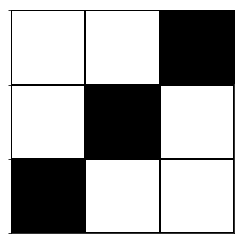

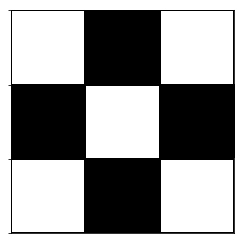

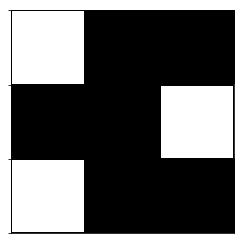

In [4]:
# f=1
display(Image('mat4.png'), Image('mat5.png'), Image('mat6.png'))

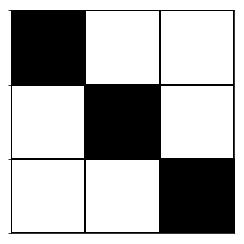

In [5]:
# f=?
display(Image('mat7.png'))

In [ ]:
# problem 1 tests here:

# Problem 2: SGD for the softmax classifier on MNIST dataset

In this problem we will test the performance of the SGD vs GD on the classification problem for the MNIST dataset. Please complete the following:
* Download the npz data from Canvas, import both the training and testing samples in the MNIST dataset using the following cell.

* Use the softmax regression set-up in the cell that follows, model (input an image, output 10 probabilities), softmax loss function, and the gradient of the loss function.

* (Graded)  Run 1 iteration of the gradient descent with the learning rate $\eta = 10^{-4}$, and 1 epoch of the stochastic gradient descent for all the training samples with the learning rate $\eta = 10^{-6}$. Compare the prediction accuracies of both approaches on the testing samples. When comparing, please either fix the random number generator seed, or use zero initial guess for both weights. A remark is that vanilla SGD may take some time since it is a `for` loop iterating 60,000 times, you may want to print the accuracy every 5000 iterations to make sure your SGD goes in the right direction, and use `tqdm_notebook` function to keep track of the iterations, of which the usage is simply:
```python
for i in tqdm_notebook(range(N)):
    (whatever needs to be done)
```
*Expected result*: 1 epoch of SGD (evaluating gradient for each sample one at a time) should achieve much higher accuracy than 1 iteration of GD (evaluating gradient for all samples at once).

* (Graded) Try the mini-batch SGD (code provided by Lecture 19 notebook) to minimize the softmax loss function, and let the mini-batch size to be 32. Choose appropriate learning rate $\eta$, number of inner iterations $M$, number of epochs (outer iterations) $n_E$, so that the algorithm converges and the prediction reaches a reasonable accuracy ($\approx 90\%$).

#### Remark: 
When using the gradient descent template in the lecture's notebook, please DO NOT evaluate the loss function at each iteration for SGD or mini-batch SGD, as it will be extremely slow. Please check the loss's value after every epoch.

In [1]:
data_train = np.load('mnist_train.npz')
data_test = np.load('mnist_test.npz')
X_train = data_train['X']
y_train = data_train['y']
X_test = data_test['X']
y_test = data_test['y']

In [2]:
# global variables:
n = np.shape(X_train)[1] # 784, which is number of pixels (number of features)
K = 10 # number of classes
N = len(y_train) # number of training samples

def sigma(X,w):
    w = w.reshape(n,K)
    if X.ndim == 1:
        X = X.reshape(1,-1)
    s = np.exp(np.matmul(X,w))
    total = np.sum(s, axis=1).reshape(-1,1)
    prob = s / total
    return prob

def loss(w,X,y):
    loss_samples = np.zeros(N)
    for k in range(K):
        loss_samples += np.log(sigma(X,w))[:,k] * (y == k)
    return -np.mean(loss_samples) 

def gradient_loss(w,X,y):
    gd_class_all = np.empty([n,K]) 
    for k in range(K):
        gd_class_k = (sigma(X,w)[:,k] - (y==k)).reshape(-1,1)*X
        gd_class_all[:,k] = np.mean(gd_class_k, axis=0)
    return gd_class_all.reshape(n*K)

def cv_acc(w,X,y):
    prob = sigma(X,w)
    highest_prob_index = np.argmax(prob, axis=1)
    return np.mean(highest_prob_index == y.astype(int))